In [1]:
# Rock Paper Scissors Example

- To begin we will create an IndiGrow class for rock, paper, scissors. It has a variable named 'type' which will be one of three strings (rock, paper, or scissors). 
- Like all IndiGrow organism classes it has an \__IndiGrow__ variable which can be used to call functions provided by the simulation.
- For this simulation the fitness of an organism is linearly proportional to the frequency of the type that it beats. The more paper organisms there are the more fit the scissors organisms will become.
- The fitness function of each organism first lets the simulation know that it will be updating the fitness value of certain organisms (note: this feature will be an optional optimization that can be turned on but should not be the default... change this!!). It then finds which organism type it beats and then uses the IndiGrow function 'find_all_attributes' to find all organism nodes which have the type they specify. It then returns the frequency of that organism's node.
- Because there is no mutation in this simulation our mutation function simply passes

SyntaxError: invalid syntax (<ipython-input-1-7e0aa629848d>, line 3)

In [14]:
class rps_class:
    beats = {'rock' : 'scissors',
             'paper' : 'rock',
             'scissors' : 'paper'}
    def __init__(self, rps_type):
        self.type = rps_type
        self.__IndiGrow__ = None

    def __fitness__(self):
        self.__IndiGrow__.mark_as_dirty(all_dirty=True)
        beat_type = self.beats[self.type]
        beat_node = self.__IndiGrow__.find_all_attributes({'type':beat_type})
        return beat_node[0]['frequency']

    def __mutate__(self):
        pass

- This event, when triggered, will go through each node in the population and write the type and frequency of each organism to the specified file. This will come in handy for plotting data after the simulation is done running.

In [15]:
import json

class rps_print_event:
    def __init__(self):
        self.__IndiGrow__ = None
        # clear current contents of file
        open('rps_data.txt', 'w').close()

    def __run_handler__(self):
        frequencies = {}
        for i in self.__IndiGrow__.population.vs:
            frequencies[i['genotype'].type] = i['frequency']
        with open('rps_data.txt', 'a+') as write_file:
            write_file.write(json.dumps(frequencies) + '\n')
        

- Here we import the IndiGrow class so that we can create a simulation object
- Note that this code seeds the randomness of the simulation so that the result will be the same each time, feel free to change/remove this seeding!
- We create an IndiGrow simulation with the specified population size of 10,000 and mutation rate of 0 (as our simulation does not require mutation)
- One of each genotype is added to the simulation with a different starting frequency. Play around with the frequency each genotype starts with for some interesting results!
- Adding in our event with the given arguments will cause it to run every 10 generations
- Running the timestep function will simulate 1 generation so we do this num_generations times!

In [16]:
from IndiGrow.IndiGrow import IndiGrow
import random
import numpy

random.seed(1892)
numpy.random.seed(17)

population_size = 1E5
num_generations = 1000

rps_simulation = IndiGrow(population_size=population_size, mutation_rate=0)

rps_simulation.add_genotype(genotype=rps_class('rock'), frequency=50/100)
rps_simulation.add_genotype(genotype=rps_class('paper'), frequency=25/100)
rps_simulation.add_genotype(genotype=rps_class('scissors'), frequency=25/100)
rps_simulation.add_event(event_class=rps_print_event, trigger_every=10)

for i in range(num_generations):
   rps_simulation.timestep()

- This code simply reads in the data we gathered in our simulation

In [17]:
import json

rps_data = []
with open('rps_data.txt', 'r') as f:
    for line in f:
        rps_data.append(json.loads(line))
rock_frequencies, paper_frequencies, scissors_frequencies = [], [], []

for data in rps_data:
    rock_frequencies.append(data['rock'])
    paper_frequencies.append(data['paper'])
    scissors_frequencies.append(data['scissors'])

- Checkout the data we gathered! Pretty cool pattern. See if you can have one genotype get to 100% frequency! Mess around with the population size and the starting frequencies.

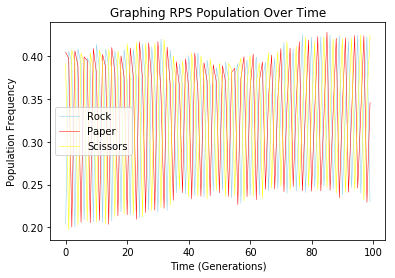

In [18]:
import matplotlib.pyplot as plt
 
# multiple line plot
plt.plot( rock_frequencies, color='skyblue', linewidth=.5, label='Rock')
plt.plot( paper_frequencies, color='red', linewidth=.5, label='Paper')
plt.plot( scissors_frequencies, color='yellow', linewidth=.5, label='Scissors')

plt.ylabel('Population Frequency')
plt.xlabel('Time (Generations)')
plt.title('Graphing RPS Population Over Time')


plt.legend()
plt.show()
